In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
import os

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

init_notebook_mode(connected=True)

# Data Preparation

In [84]:
files = os.listdir('Covid-19')
files = sorted(files)
files

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

In [85]:
def read_data(path,filename):
    return pd.read_csv(path+'/'+filename)

In [86]:
path = 'Covid-19'

In [87]:
world_data = read_data(path,'worldometer_data.csv')

In [88]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [89]:
world_data.shape

(209, 16)

In [90]:
day_wise = read_data(path,files[2])

In [91]:
group_data = read_data(path,files[3])

In [92]:
usa_data = read_data(path,files[4])

In [93]:
province_data = read_data(path,files[1])

##### Which country has maximum Total cases, Deaths, Recovered and active cases


In [94]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [95]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

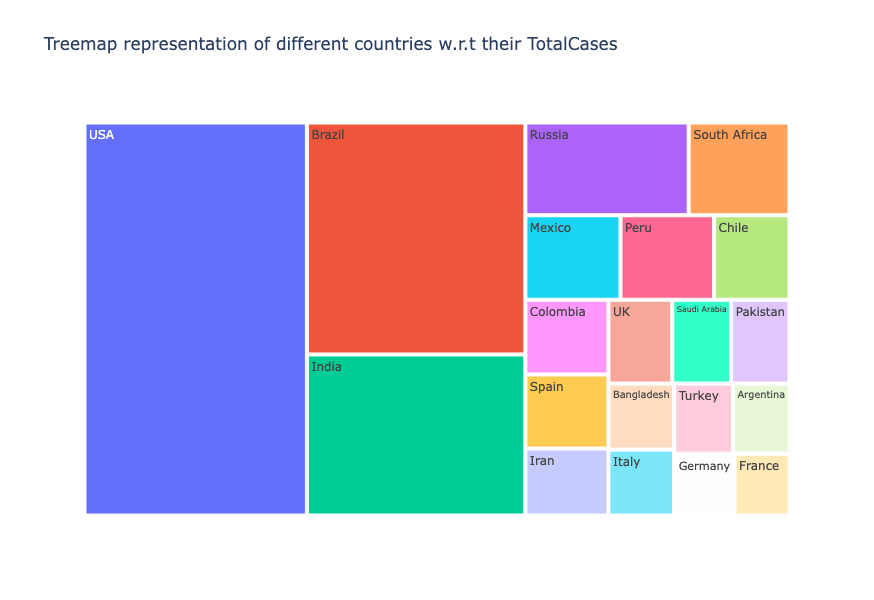

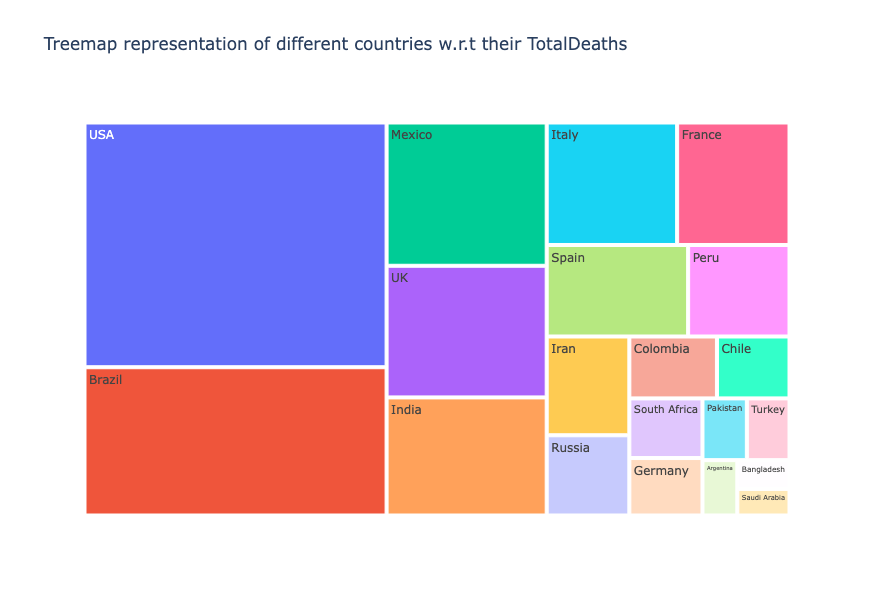

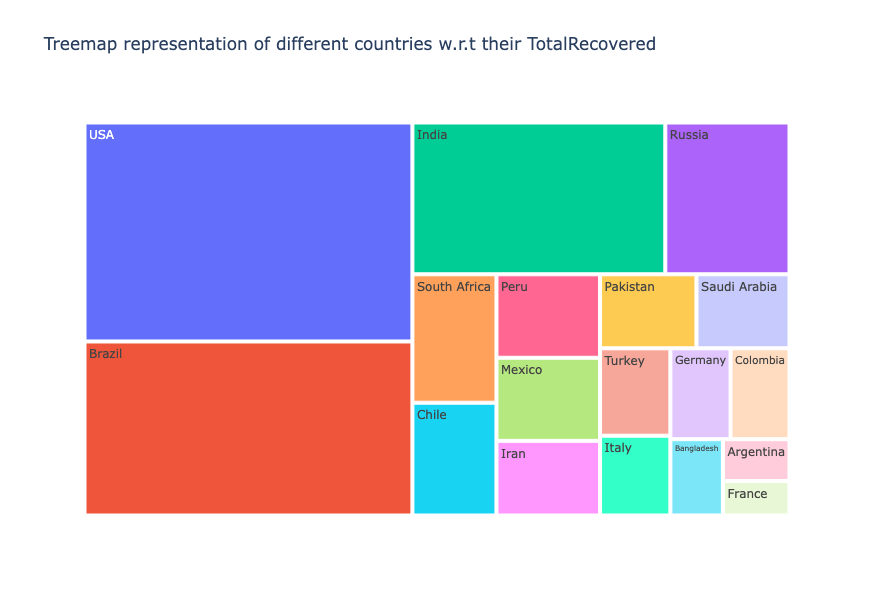

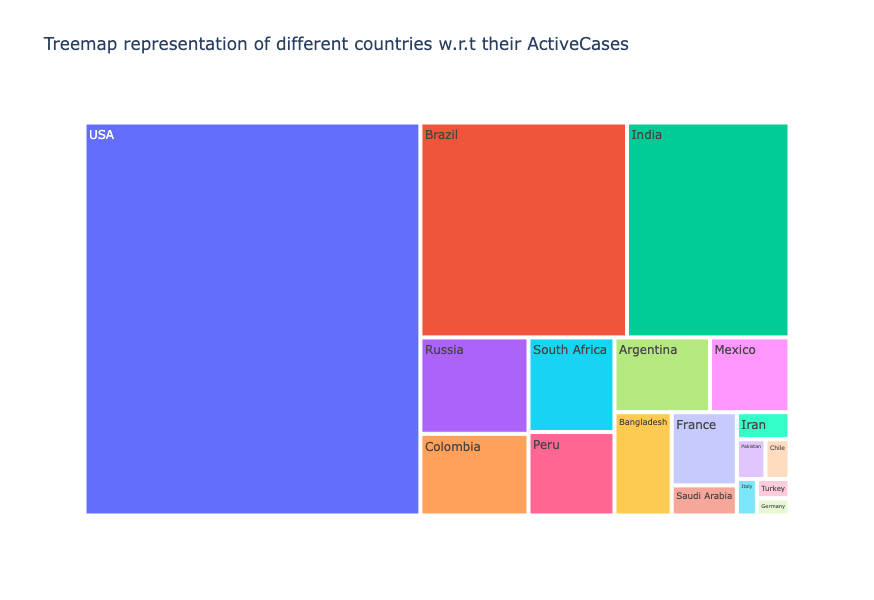

In [96]:
columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
for i in columns:
    fig = px.treemap(data_frame=world_data.iloc[:20], values=i, path=['Country/Region'],
                     title =f'Treemap representation of different countries w.r.t their {i}', 
                     width=875,
                     height=600)
    fig.show()

##### What is the trend of Confirmed Deaths Recovered Active cases

In [97]:
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [98]:
day_wise.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

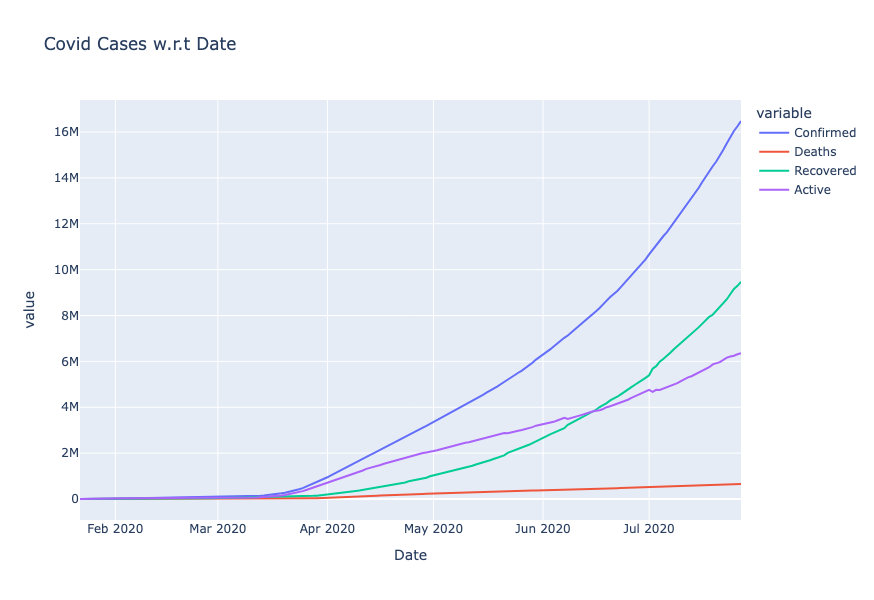

In [99]:
px.line(data_frame=day_wise, 
        x = 'Date', 
        y = ['Confirmed', 'Deaths', 'Recovered', 'Active'],
        title = 'Covid Cases w.r.t Date',
        width=875, height=600)

##### Visualise population to tests done ratio

In [100]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [101]:
pop_test_ratio = world_data.Population/world_data.TotalTests.iloc[:20]

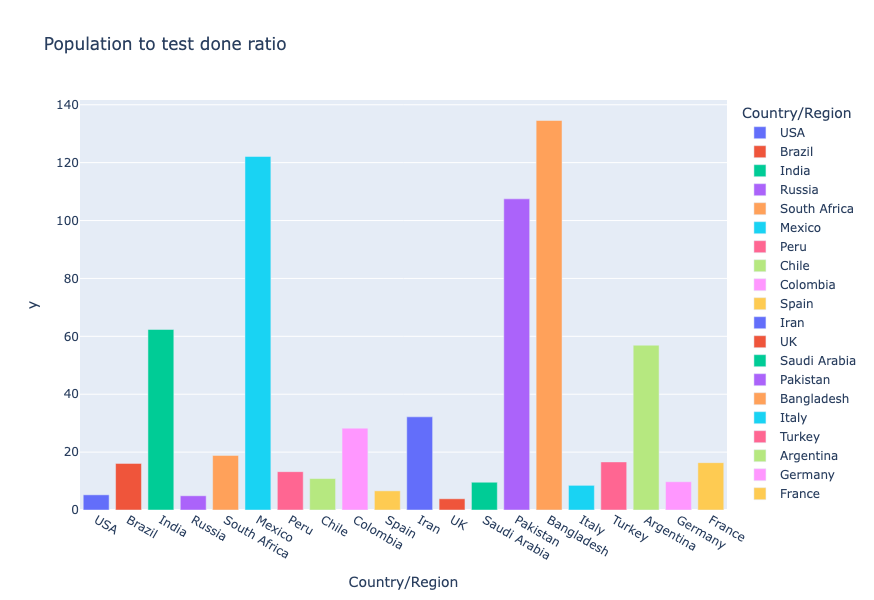

In [102]:
px.bar(world_data.iloc[:20], x = 'Country/Region', y = pop_test_ratio[:20], color = 'Country/Region',
        title = 'Population to test done ratio',width=875,height=600)

##### 20 countries that are badly affected by corona

In [103]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

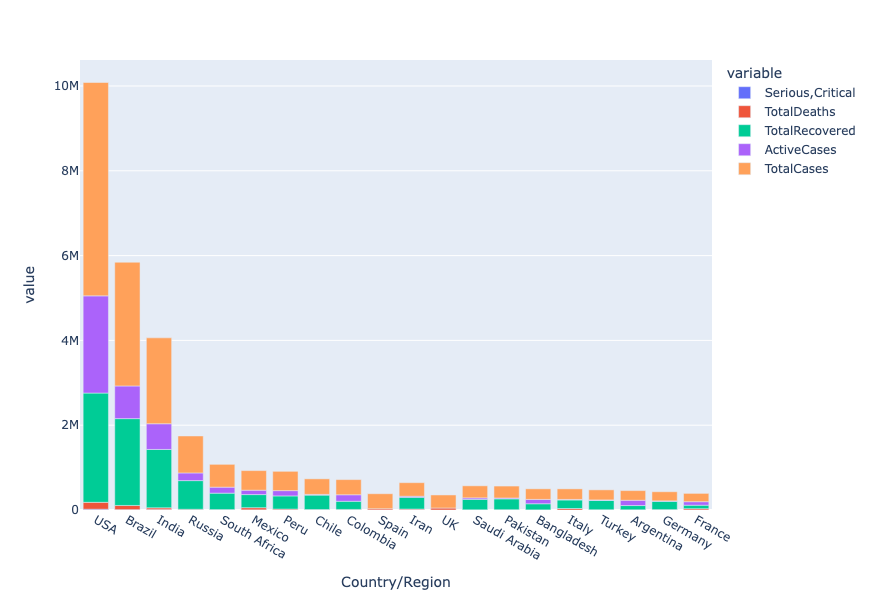

In [104]:
px.bar(world_data.iloc[:20],x='Country/Region',
       y=['Serious,Critical','TotalDeaths','TotalRecovered', 'ActiveCases','TotalCases'],
       width=875,height=600)

#### Top 20 countries of Total Confirmed Cases, Total Recovered Cases, Total Active Cases ans Total Deaths

##### Worst 20 coutries having max. Confirmed Cases

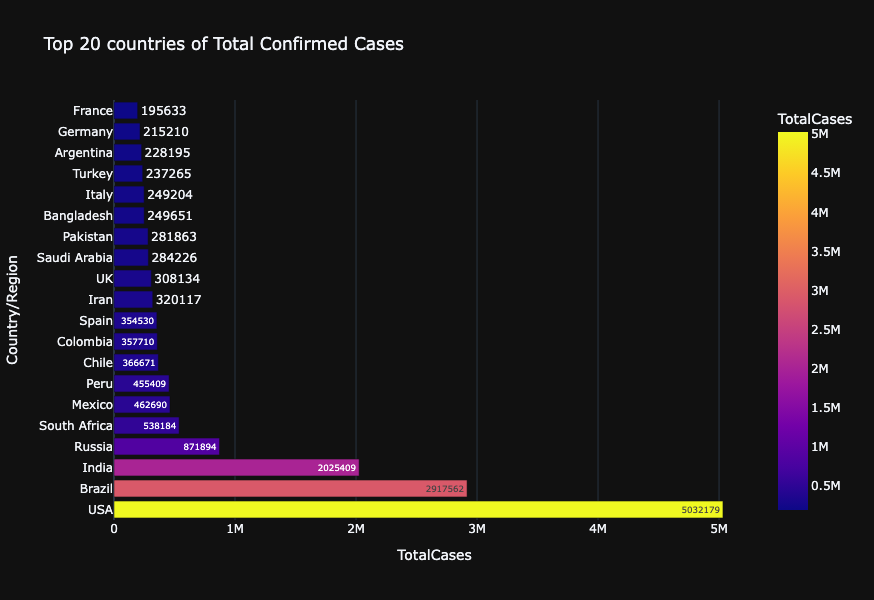

In [105]:
fig = px.bar(world_data.iloc[:20],y='Country/Region',
       x='TotalCases',
       text='TotalCases',
       title='Top 20 countries of Total Confirmed Cases',
       color='TotalCases',
       width=875,
       height=600)
fig.update_layout(template='plotly_dark')
fig.show()

##### Worst 20 coutries having max. Total Deaths

In [106]:
world_data.sort_values(by='TotalDeaths', ascending=False)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
11,UK,Europe,6.792203e+07,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Saint Kitts and Nevis,North America,5.323700e+04,17,NaN,NaN,NaN,16.0,NaN,1.0,NaN,319.0,NaN,1146.0,21526.0,Americas
203,Greenland,North America,5.678000e+04,14,NaN,NaN,NaN,14.0,NaN,0.0,NaN,247.0,NaN,5977.0,105266.0,Europe
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN


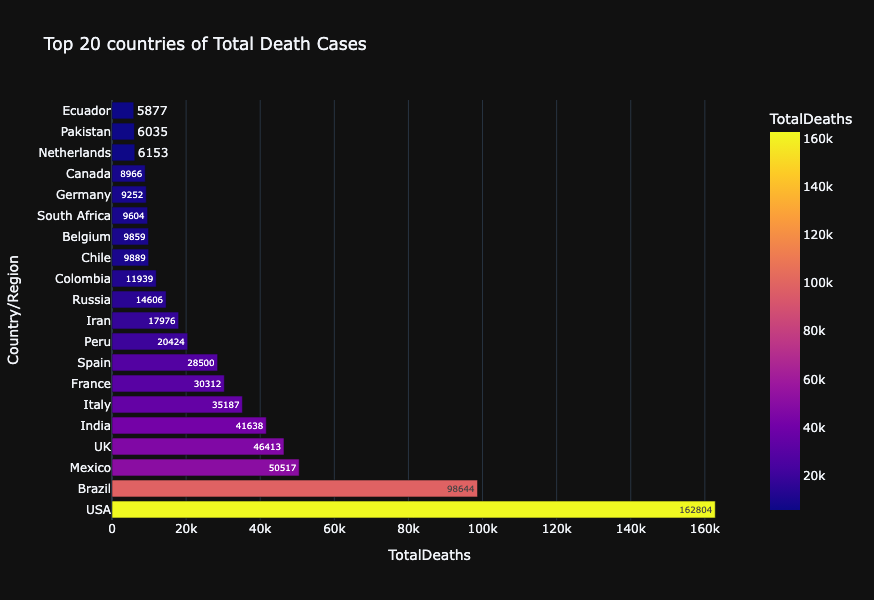

In [107]:
fig = px.bar(world_data.sort_values(by='TotalDeaths', ascending=False)[:20],
             y='Country/Region',
             x='TotalDeaths',
             text='TotalDeaths',
             title='Top 20 countries of Total Death Cases',
             color='TotalDeaths',
             width=875,
             height=600)
fig.update_layout(template='plotly_dark')
fig.show()

##### Worst 20 coutries having max. Active Cases

In [108]:
world_data.sort_values(by='ActiveCases', ascending=False)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,San Marino,Europe,3.393800e+04,699,NaN,42.0,NaN,657.0,NaN,0.0,NaN,20596.0,1238.0,6068.0,178797.0,Europe
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe
11,UK,Europe,6.792203e+07,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe
29,Sweden,Europe,1.010560e+07,81967,NaN,5766.0,NaN,NaN,NaN,NaN,38.0,8111.0,571.0,863315.0,85429.0,Europe


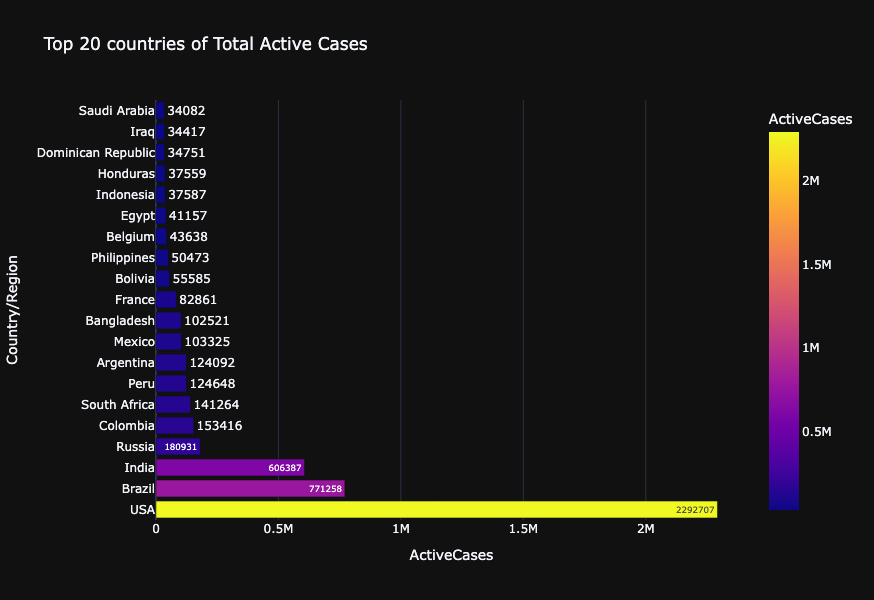

In [109]:
fig = px.bar(world_data.sort_values(by='ActiveCases', ascending=False)[:20],
             y='Country/Region',
             x='ActiveCases',
             text='ActiveCases',
             title='Top 20 countries of Total Active Cases',
             color='ActiveCases',
             width=875,
             height=600)
fig.update_layout(template='plotly_dark')
fig.show()

##### Worst 20 coutries having max. Recovered Cases

In [110]:
world_data.sort_values(by='TotalRecovered', ascending=False)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe
11,UK,Europe,6.792203e+07,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe
29,Sweden,Europe,1.010560e+07,81967,NaN,5766.0,NaN,NaN,NaN,NaN,38.0,8111.0,571.0,863315.0,85429.0,Europe


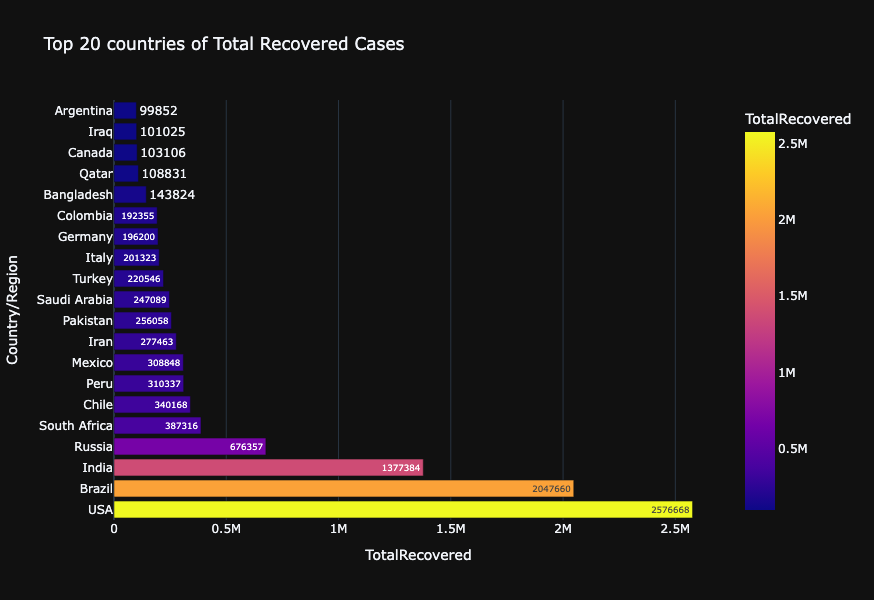

In [111]:
fig = px.bar(world_data.sort_values(by='TotalRecovered', ascending=False)[:20],
             y='Country/Region',
             x='TotalRecovered',
             text='TotalRecovered',
             title='Top 20 countries of Total Recovered Cases',
             color='TotalRecovered',
             width=875,
             height=600)
fig.update_layout(template='plotly_dark')
fig.show()

##### Pie Chart Representation of stats of the most affected countries

In [112]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


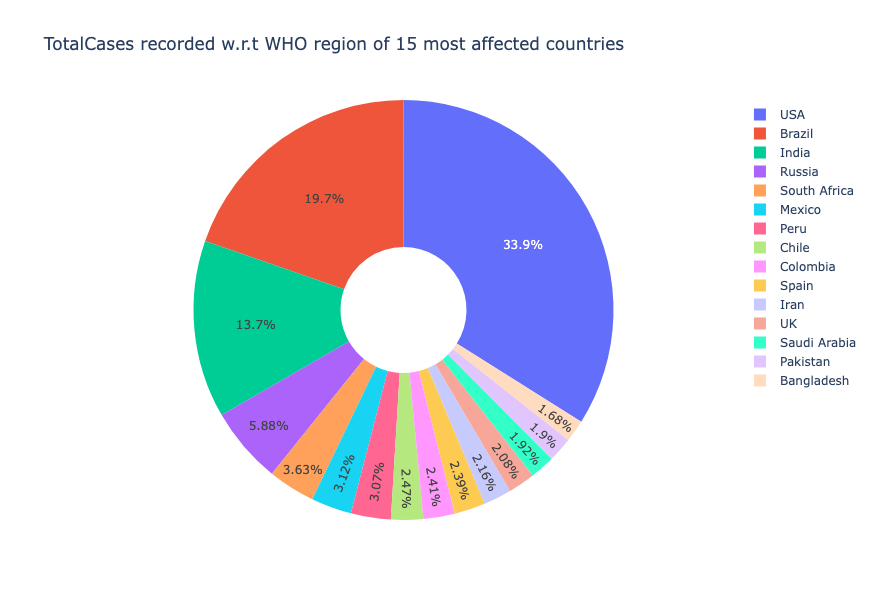

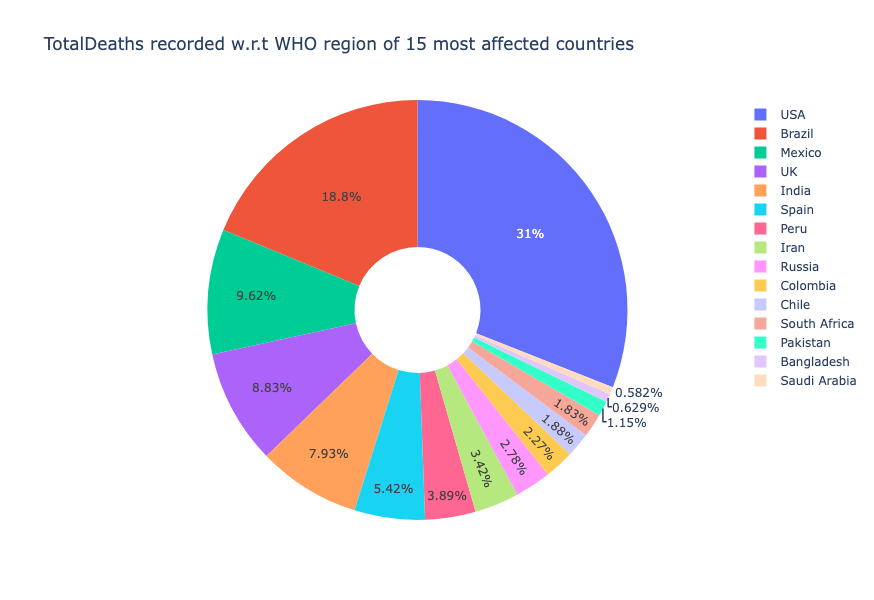

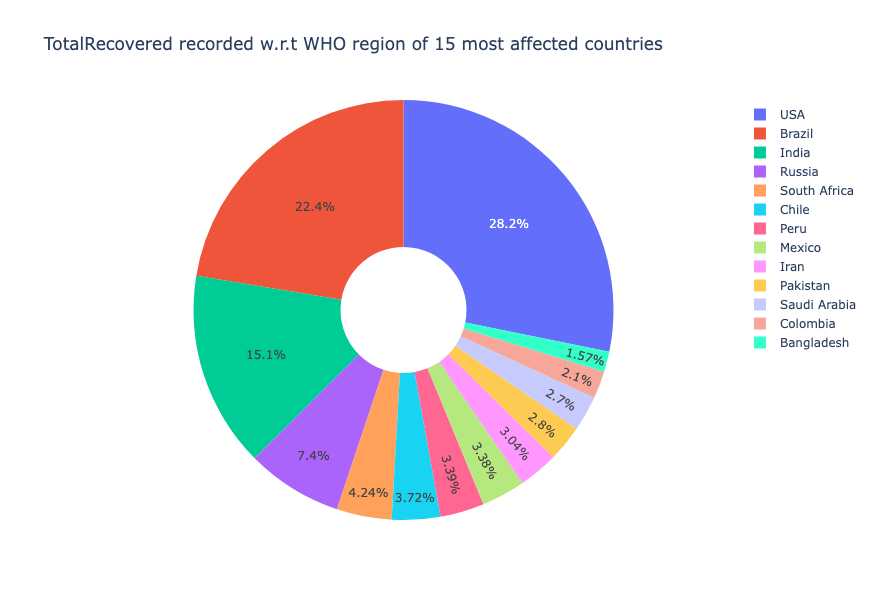

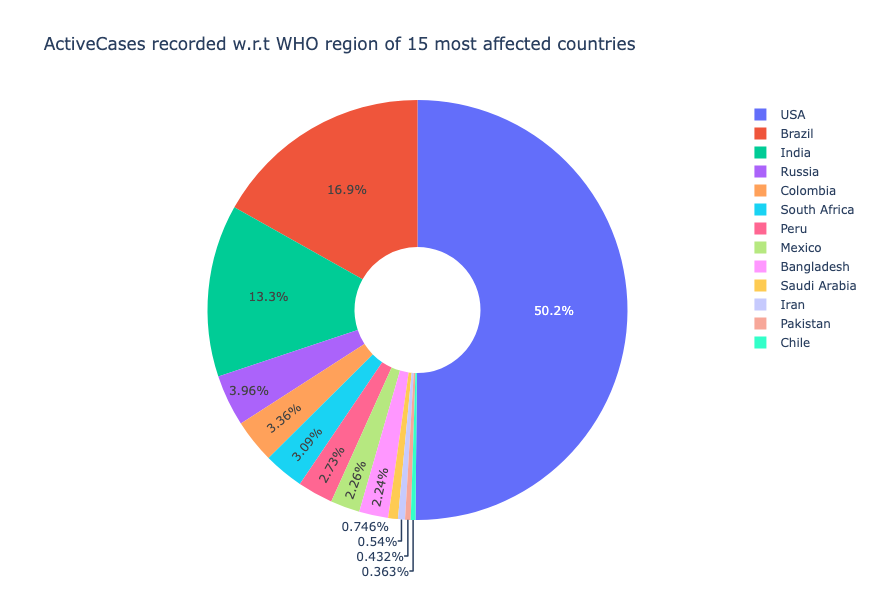

In [113]:
label = world_data[:15]['Country/Region'].values
cases = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
for i in cases:
    fig = px.pie(world_data[:15],
           values=i,
           names=label,
           hole=0.3, 
           title = f'{i} recorded w.r.t WHO region of 15 most affected countries',
           width = 875,
           height=600)
    fig.show()

##### Deaths to Confirmed Ratio

In [114]:
deaths_to_confirmed = world_data.TotalDeaths/world_data.TotalCases
deaths_to_confirmed[:20]

0     0.032353
1     0.033810
2     0.020558
3     0.016752
4     0.017845
5     0.109181
6     0.044848
7     0.026970
8     0.033376
9     0.080388
10    0.056154
11    0.150626
12    0.010748
13    0.021411
14    0.013242
15    0.141198
16    0.024437
17    0.018629
18    0.042991
19    0.154943
dtype: float64

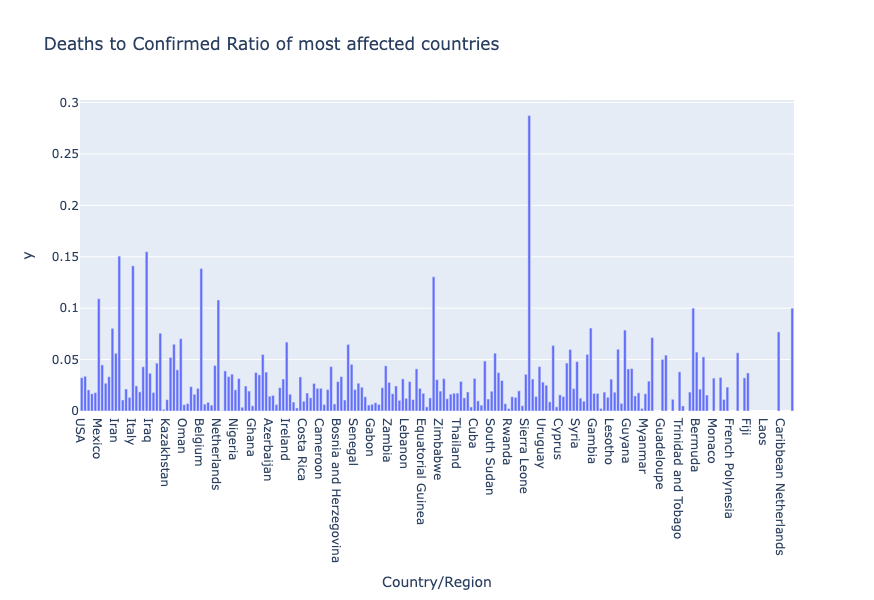

In [115]:
fig = px.bar(world_data,
             x='Country/Region',
             y=deaths_to_confirmed,
             title='Deaths to Confirmed Ratio of most affected countries',
             width=875,
             height=600)
fig.show()

##### Deaths to Recovered Ratio

In [116]:
deaths_to_recovered = world_data.TotalDeaths/world_data.TotalRecovered
deaths_to_recovered[:20]

0     0.063184
1     0.048174
2     0.030230
3     0.021595
4     0.024796
5     0.163566
6     0.065812
7     0.029071
8     0.062068
9          NaN
10    0.064787
11         NaN
12    0.012364
13    0.023569
14    0.022986
15    0.174779
16    0.026289
17    0.042573
18    0.047156
19    0.367596
dtype: float64

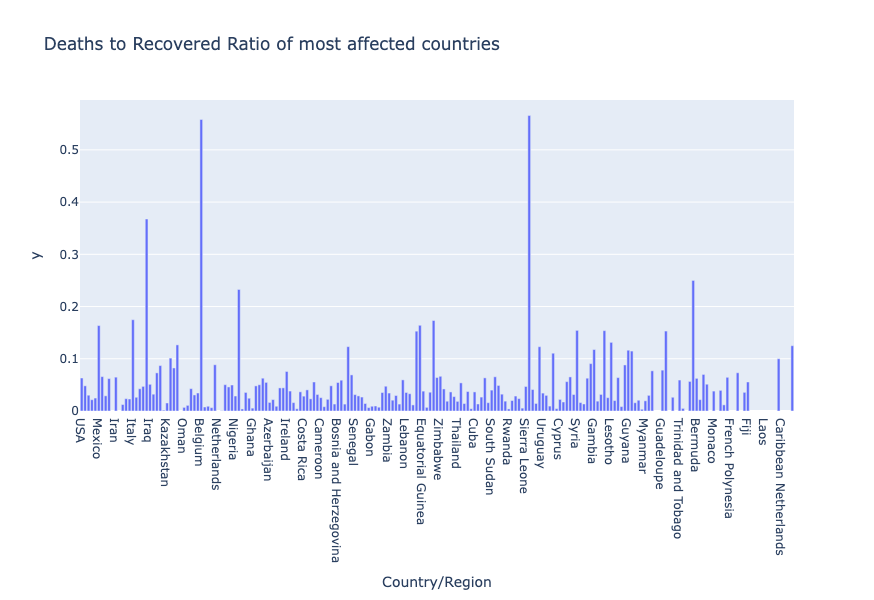

In [117]:
fig = px.bar(world_data,
             x='Country/Region',
             y=deaths_to_recovered,
             title='Deaths to Recovered Ratio of most affected countries',
             width=875,
             height=600)
fig.show()

##### Tests to Confirmed Ratio

In [118]:
tests_to_confirmed = world_data.TotalTests/world_data.TotalCases
tests_to_confirmed[:20]

0     12.547170
1      4.526446
2     10.935742
3     34.083165
4      5.852658
5      2.284283
6      5.475142
7      4.801621
8      5.037139
9     19.925899
10     8.161900
11    56.842912
12    12.791599
13     7.304513
14     4.907347
15    28.489563
16    21.418254
17     3.481864
18    39.898927
19    20.406608
dtype: float64

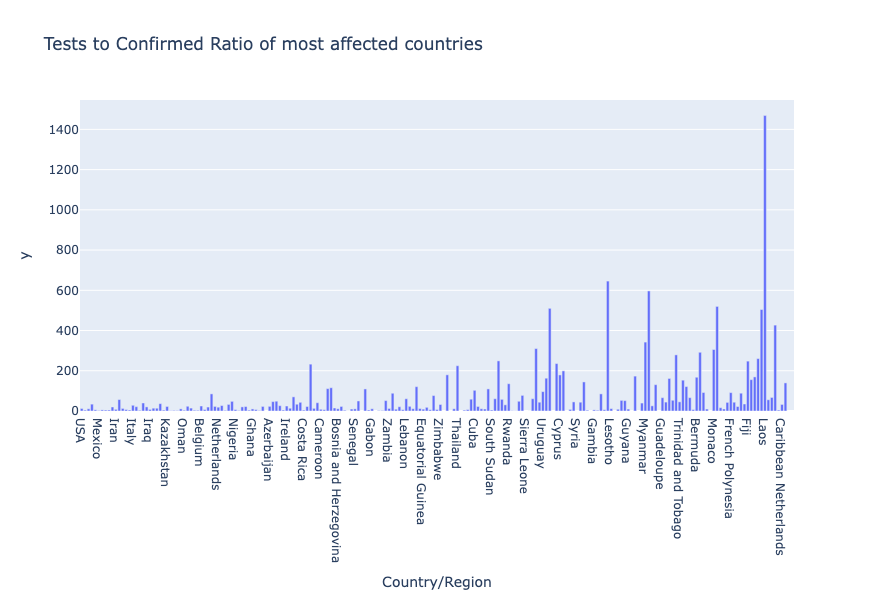

In [119]:
fig = px.bar(world_data,
             x='Country/Region',
             y=tests_to_confirmed,
             title='Tests to Confirmed Ratio of most affected countries',
             width=875,
             height=600)
fig.show()

##### Serious to Deaths Ratio

In [120]:
serious_to_deaths = world_data['Serious,Critical']/world_data.TotalDeaths
serious_to_deaths[:20]

0     0.112381
1     0.084323
2     0.214804
3     0.157470
4     0.056122
5     0.078924
6     0.069820
7     0.137324
8     0.125052
9     0.021649
10    0.231197
11    0.001573
12    0.626841
13    0.134051
14         NaN
15    0.001194
16    0.100034
17    0.270525
18    0.025508
19    0.012668
dtype: float64

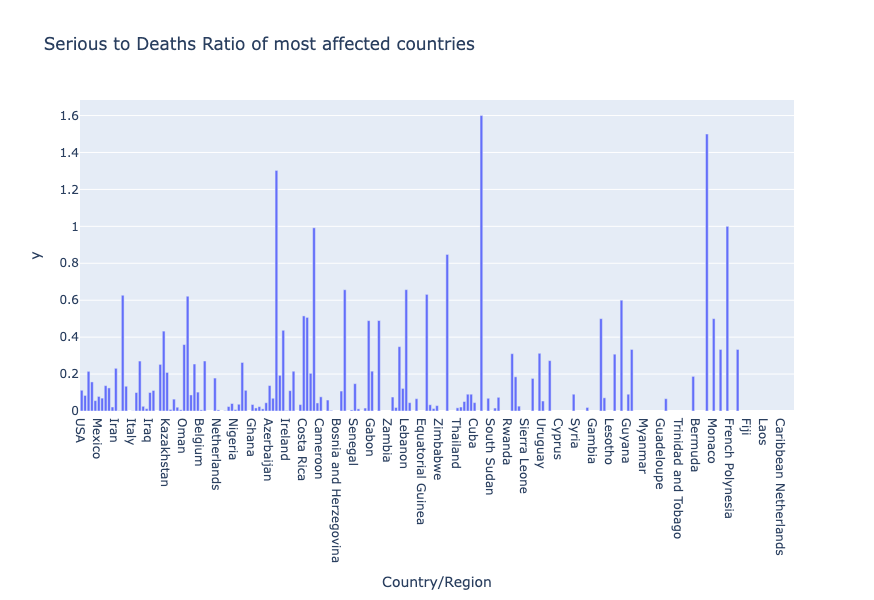

In [121]:
fig = px.bar(world_data,
             x='Country/Region',
             y=serious_to_deaths,
             title='Serious to Deaths Ratio of most affected countries',
             width=875,
             height=600)
fig.show()

##### Visualize Confirmed, Active, Recovered, Deaths Cases(entire statistics) of a particular country (Automate this)

In [122]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [123]:
group_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [124]:
def country_vis(df,country):
    data = df[df['Country/Region'] == country]
    data2 = data.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]
    
    fig = make_subplots(rows=1, cols=4, subplot_titles=('Confirmed','Active','Recovered','Deaths'))
    fig.add_trace(
    go.Scatter(name='Confirmed',x=data2['Date'],y=data2['Confirmed']),row=1,col=1
    )
    fig.add_trace(
    go.Scatter(name='Deaths',x=data2['Date'],y=data2['Deaths']),row=1,col=2
    )
    fig.add_trace(
    go.Scatter(name='Recovered',x=data2['Date'],y=data2['Recovered']),row=1,col=3
    )
    fig.add_trace(
    go.Scatter(name='Active',x=data2['Date'],y=data2['Active']),row=1,col=4
    )

    fig.update_layout(height=600,width=875, title_text=f"Date vs Recorded cases of {country}", template = 'plotly_dark')
    fig.show()
    

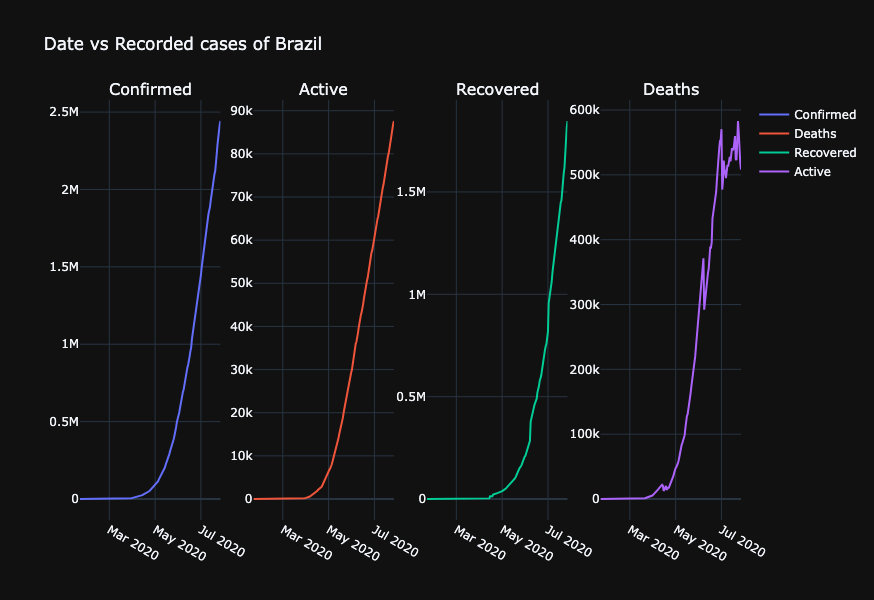

In [125]:
country_vis(group_data,'Brazil')

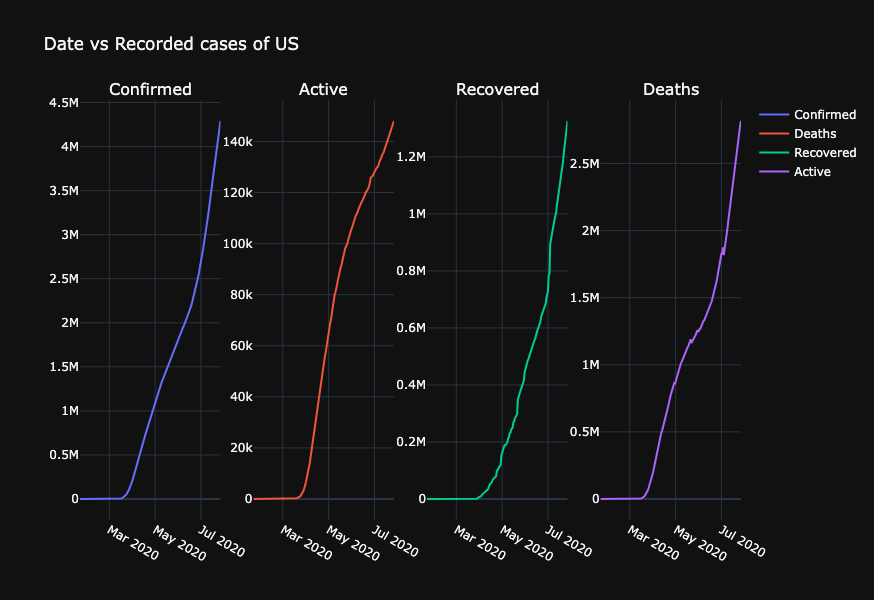

In [129]:
country_vis(group_data,'US')

In [133]:
group_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

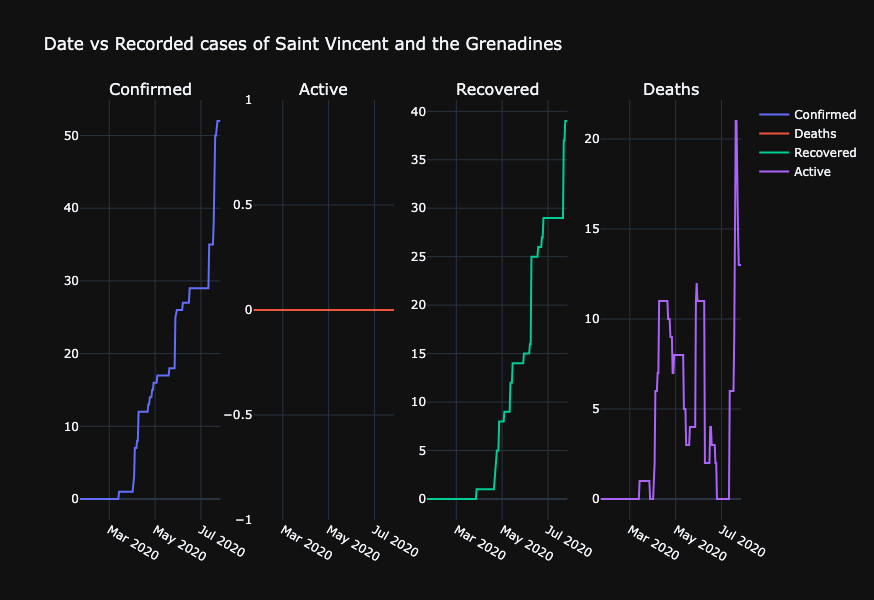

In [135]:
country_vis(group_data,'Saint Vincent and the Grenadines')